In [ ]:
import sys
import os

sys.path.append(os.path.abspath('../../'))

In [2]:
import networkx as nx

from Classes.BiasedInfluenceGraph import *
from Classes.WordGenerator import *

## Negative slope function

In [36]:
alpha = -1

def neg_lin(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return  alpha * x

True


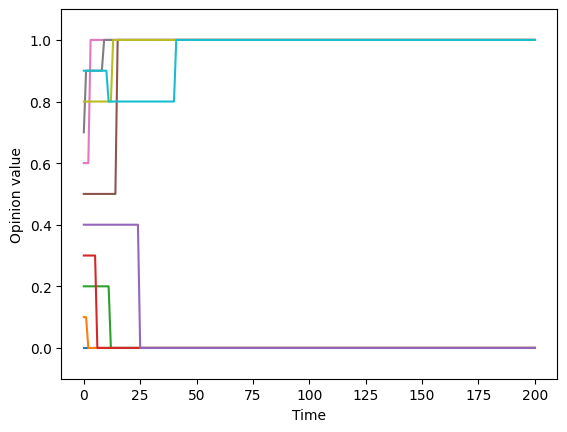

In [ ]:
# Fig 1c. Random Erdos-Renyi graph
n = 10
p = 0.4
B0 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

graph = nx.fast_gnp_random_graph(n, p, directed=True)

G = BiasedInfluenceGraph(n,G=graph, ops=B0, influence_fn=lambda g, e: 1,bias_fn=neg_lin)

word_len = 20*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution().savefig('../../images/B_region/OE_nlin-1.png', dpi=300)

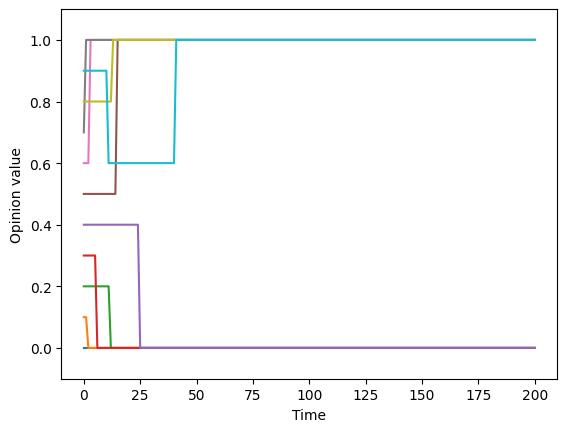

In [ ]:
G2 = BiasedInfluenceGraph(n,G=graph, ops=B0, influence_fn=lambda g, e: 1,bias_fn=lambda g, e:-3* (g.opinion[e[0]] - g.opinion[e[1]]))

G2.execute_word(w)

G2.plot_opinion_evolution().savefig('../../images/B_region/OE_nlin-3.png', dpi=300)


## Backfire Funtion

Backfire function
$backf(x) = -x^3$

In [18]:
def backf(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return -(x ** 3)

True


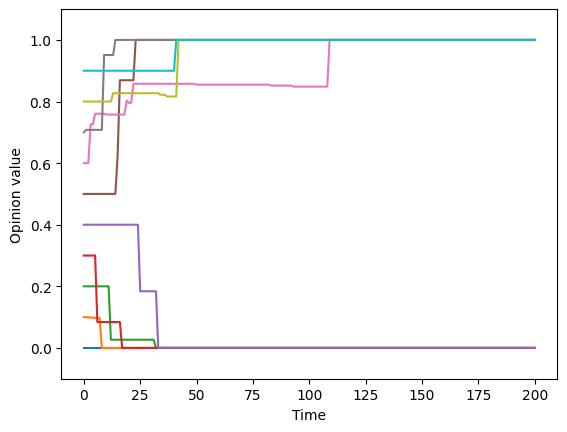

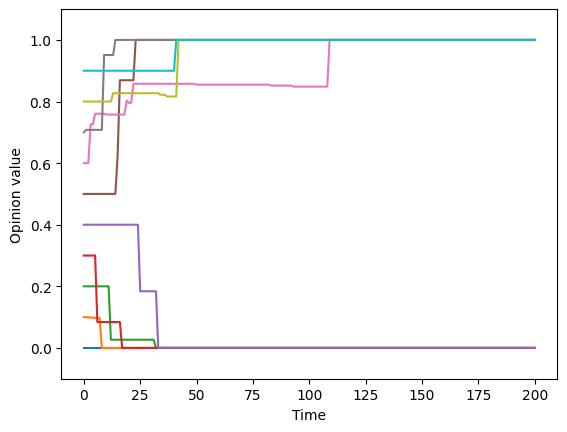

In [73]:
# Fig 1c. Random Erdos-Renyi graph
n = 20
p = 0.4
B0 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

G = BiasedInfluenceGraph(n,G=graph, ops=B0, influence_fn=lambda g, e: 1,bias_fn=backf)

word_len = 10*n
#w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

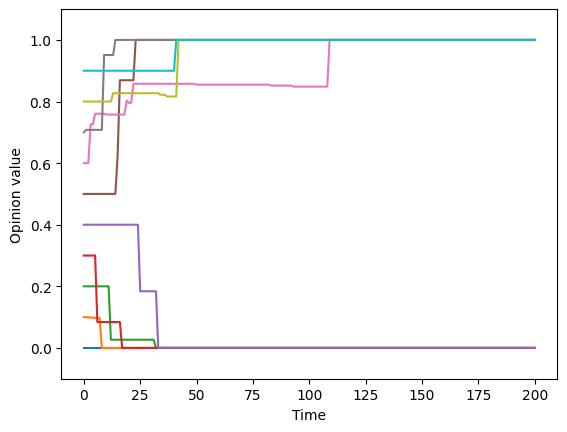

In [ ]:
G.plot_opinion_evolution().savefig('../../images/B_region/OE_backf.png', dpi=300)